This Jupyter notebook provides a review of the transaction history for a Demo account used for testing strategies. The primary purpose of this notebook is to refresh the knowledge of pandas, numpy, and visualization libraries, rather than evaluating trading strategies.

The notebook explores the market data, performs data analysis using pandas and numpy, and visualizes the data using various visualization libraries. It aims to serve as a practice exercise for working with these tools and techniques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TransactionHistory-(09-06-2020)-(15-06-2023).csv")
df_copy = pd.read_csv("TransactionHistory-(09-06-2020)-(15-06-2023).csv")
df

,Date,Summary,MarketName,Period,ProfitAndLoss,Transaction type,Reference,Open level,Close level,Size,Currency,PL Amount,Cash transaction,DateUtc,OpenDateUtc,CurrencyIsoCode
0,15/06/23,NaN,Daily Admin Fee - Commodities Interest for 1 d...,-,£-0.16,WITH,11813155,-,0.0,-,£,-0.16,False,2023-06-15T01:12:58,2023-06-15T01:12:58,GBP
1,15/06/23,NaN,Daily Financing Adjustment - Commodities Basis...,-,£-2.17,WITH,11667185,-,0.0,-,£,-2.17,False,2023-06-15T01:12:49,2023-06-15T01:12:49,GBP
2,14/06/23,NaN,Daily Financing Adjustment - FX Interest for 1...,-,£2.13,DEPO,11152195,-,0.0,-,£,2.13,False,2023-06-14T11:25:54,2023-06-14T11:25:54,GBP
3,14/06/23,NaN,Daily Admin Fee - FX Interest for 1 day EUR/US...,-,£-0.96,WITH,11452195,-,0.0,-,£,-0.96,False,2023-06-14T11:14:02,2023-06-14T11:14:02,GBP
4,14/06/23,NaN,Daily Admin Fee - Commodities Interest for 1 d...,-,£-0.16,WITH,11524187,-,0.0,-,£,-0.16,False,2023-06-14T01:02:12,2023-06-14T01:02:12,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,16/10/20,CFD funding Interest Paid,Long Interest for US/Can shares 15/10/20 $. co...,-,£-1.28,WITH,41118222,-,0.0,-,£,-1.28,False,2020-10-16T02:48:09,2020-10-16T02:48:09,GBP
1328,15/10/20,CFD funding Interest Paid,Long Interest for US/Can shares 14/10/20 $. co...,-,£-1.31,WITH,41185220,-,0.0,-,£,-1.31,False,2020-10-15T02:32:23,2020-10-15T02:32:23,GBP
1329,14/10/20,CFD funding Interest Paid,Long Interest for US/Can shares 13/10/20 $. co...,-,£-1.35,WITH,41709220,-,0.0,-,£,-1.35,False,2020-10-14T03:28:19,2020-10-14T03:28:19,GBP
1330,13/10/20,Commissions,Workhorse Group Inc COMM DIAAAAEHFU9JXBA Conve...,-,£-15.55,WITH,41533220,-,0.0,-,£,-15.55,False,2020-10-13T18:04:55,2020-10-13T18:04:55,GBP


# Cleaning

In [3]:
unique_summary = df["Summary"].unique().tolist()
unique_summary

[nan,
 'CFD funding Interest Received',
 'Closing trades',
 'Commissions',
 'CFD funding Interest Paid',
 'FX Interest',
 'Cash In',
 'Cash Out',
 'Stock Borrowing Costs',
 'Currency Transfers']

In [4]:
nan_count = df["Summary"].isna().sum() #Looking over the data most NA values are related to fees or interest.
nan_count


638

In [5]:
interest_or_fees = "Interest or fees"

df["Summary"].fillna(interest_or_fees, inplace=True)

string_prefix = "CFD funding Interest Received"
df.loc[df["Summary"].str.startswith(string_prefix), "Summary"] = interest_or_fees

string_prefix2 = "Commissions"
df.loc[df["Summary"].str.startswith(string_prefix2), "Summary"] = interest_or_fees

string_prefix3 = "CFD funding Interest Paid"
df.loc[df["Summary"].str.startswith(string_prefix3), "Summary"] = interest_or_fees

string_prefix4 = "FX Interest"
df.loc[df["Summary"].str.startswith(string_prefix3), "Summary"] = interest_or_fees

string_prefix5 = "Stock Borrowing Costs"
df.loc[df["Summary"].str.startswith(string_prefix3), "Summary"] = interest_or_fees

string_prefix6 = "Currency Transfers"
df.loc[df["Summary"].str.startswith(string_prefix3), "Summary"] = interest_or_fees

df

,Date,Summary,MarketName,Period,ProfitAndLoss,Transaction type,Reference,Open level,Close level,Size,Currency,PL Amount,Cash transaction,DateUtc,OpenDateUtc,CurrencyIsoCode
0,15/06/23,Interest or fees,Daily Admin Fee - Commodities Interest for 1 d...,-,£-0.16,WITH,11813155,-,0.0,-,£,-0.16,False,2023-06-15T01:12:58,2023-06-15T01:12:58,GBP
1,15/06/23,Interest or fees,Daily Financing Adjustment - Commodities Basis...,-,£-2.17,WITH,11667185,-,0.0,-,£,-2.17,False,2023-06-15T01:12:49,2023-06-15T01:12:49,GBP
2,14/06/23,Interest or fees,Daily Financing Adjustment - FX Interest for 1...,-,£2.13,DEPO,11152195,-,0.0,-,£,2.13,False,2023-06-14T11:25:54,2023-06-14T11:25:54,GBP
3,14/06/23,Interest or fees,Daily Admin Fee - FX Interest for 1 day EUR/US...,-,£-0.96,WITH,11452195,-,0.0,-,£,-0.96,False,2023-06-14T11:14:02,2023-06-14T11:14:02,GBP
4,14/06/23,Interest or fees,Daily Admin Fee - Commodities Interest for 1 d...,-,£-0.16,WITH,11524187,-,0.0,-,£,-0.16,False,2023-06-14T01:02:12,2023-06-14T01:02:12,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,16/10/20,Interest or fees,Long Interest for US/Can shares 15/10/20 $. co...,-,£-1.28,WITH,41118222,-,0.0,-,£,-1.28,False,2020-10-16T02:48:09,2020-10-16T02:48:09,GBP
1328,15/10/20,Interest or fees,Long Interest for US/Can shares 14/10/20 $. co...,-,£-1.31,WITH,41185220,-,0.0,-,£,-1.31,False,2020-10-15T02:32:23,2020-10-15T02:32:23,GBP
1329,14/10/20,Interest or fees,Long Interest for US/Can shares 13/10/20 $. co...,-,£-1.35,WITH,41709220,-,0.0,-,£,-1.35,False,2020-10-14T03:28:19,2020-10-14T03:28:19,GBP
1330,13/10/20,Interest or fees,Workhorse Group Inc COMM DIAAAAEHFU9JXBA Conve...,-,£-15.55,WITH,41533220,-,0.0,-,£,-15.55,False,2020-10-13T18:04:55,2020-10-13T18:04:55,GBP


In [6]:
df["ProfitAndLoss"] = df["ProfitAndLoss"].str.replace("[^0-9.-]", "", regex=True)
df["ProfitAndLoss"] = pd.to_numeric(df["ProfitAndLoss"])

df

,Date,Summary,MarketName,Period,ProfitAndLoss,Transaction type,Reference,Open level,Close level,Size,Currency,PL Amount,Cash transaction,DateUtc,OpenDateUtc,CurrencyIsoCode
0,15/06/23,Interest or fees,Daily Admin Fee - Commodities Interest for 1 d...,-,-0.16,WITH,11813155,-,0.0,-,£,-0.16,False,2023-06-15T01:12:58,2023-06-15T01:12:58,GBP
1,15/06/23,Interest or fees,Daily Financing Adjustment - Commodities Basis...,-,-2.17,WITH,11667185,-,0.0,-,£,-2.17,False,2023-06-15T01:12:49,2023-06-15T01:12:49,GBP
2,14/06/23,Interest or fees,Daily Financing Adjustment - FX Interest for 1...,-,2.13,DEPO,11152195,-,0.0,-,£,2.13,False,2023-06-14T11:25:54,2023-06-14T11:25:54,GBP
3,14/06/23,Interest or fees,Daily Admin Fee - FX Interest for 1 day EUR/US...,-,-0.96,WITH,11452195,-,0.0,-,£,-0.96,False,2023-06-14T11:14:02,2023-06-14T11:14:02,GBP
4,14/06/23,Interest or fees,Daily Admin Fee - Commodities Interest for 1 d...,-,-0.16,WITH,11524187,-,0.0,-,£,-0.16,False,2023-06-14T01:02:12,2023-06-14T01:02:12,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,16/10/20,Interest or fees,Long Interest for US/Can shares 15/10/20 $. co...,-,-1.28,WITH,41118222,-,0.0,-,£,-1.28,False,2020-10-16T02:48:09,2020-10-16T02:48:09,GBP
1328,15/10/20,Interest or fees,Long Interest for US/Can shares 14/10/20 $. co...,-,-1.31,WITH,41185220,-,0.0,-,£,-1.31,False,2020-10-15T02:32:23,2020-10-15T02:32:23,GBP
1329,14/10/20,Interest or fees,Long Interest for US/Can shares 13/10/20 $. co...,-,-1.35,WITH,41709220,-,0.0,-,£,-1.35,False,2020-10-14T03:28:19,2020-10-14T03:28:19,GBP
1330,13/10/20,Interest or fees,Workhorse Group Inc COMM DIAAAAEHFU9JXBA Conve...,-,-15.55,WITH,41533220,-,0.0,-,£,-15.55,False,2020-10-13T18:04:55,2020-10-13T18:04:55,GBP


In [7]:
df_profit_loss = df.groupby("Summary").agg({
    "ProfitAndLoss": ["sum"],
    "MarketName": ["size"]
}).reset_index()
column_totals = df_profit_loss.sum(numeric_only=True)
total_row = pd.Series(column_totals, name="Total")
df_profit_loss = df_profit_loss.append(total_row)
df_profit_loss

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_21296\2891138739.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_profit_loss = df_profit_loss.append(total_row)


,Summary,ProfitAndLoss,MarketName
,,sum,size
0,Cash In,26752.23,4.0
1,Cash Out,-9000.00,1.0
2,Closing trades,22618.93,147.0
3,Currency Transfers,2.51,4.0
4,FX Interest,-169.42,119.0
5,Interest or fees,-4989.88,1026.0
6,Stock Borrowing Costs,-4.02,31.0
Total,NaN,35210.35,1332.0


As a reminder this is a demo account, but this gives a pretty good idea behind the financial model for a broker. Fees and interest. 

## Reviewing transactions of executed trades

In [8]:
closing_trades = df[df["Summary"] == "Closing trades"].reset_index(drop=True)
closing_trades = closing_trades.drop(["Currency", "PL Amount", "Reference", "Cash transaction", "Transaction type", "CurrencyIsoCode", "Summary", "Period"], axis=1)

In [9]:
closing_trades["Cumulative PL"] = closing_trades["ProfitAndLoss"][::-1].cumsum()[::-1]
closing_trades

,Date,MarketName,ProfitAndLoss,Open level,Close level,Size,DateUtc,OpenDateUtc,Cumulative PL
0,31/05/23,Spot Gold (£1 Contract),453.60,2008.15,1962.79000,-10,2023-05-31T12:52:26,2023-05-12T12:32:29,22618.93
1,31/05/23,FTSE 100 Cash (£2),2328.00,7558.8,7500.60000,-20,2023-05-31T12:52:13,2023-01-03T14:29:33,22165.33
2,17/05/23,ASOS PLC,-1417.50,528.6,434.10000,+1500,2023-05-17T11:44:33,2023-05-12T12:32:14,19837.33
3,16/05/23,Natural Gas (£1),1128.00,2256,2538.00000,+4,2023-05-16T15:30:21,2023-05-12T12:31:17,21254.83
4,03/01/23,EUR/USD Mini converted at 0.828303850155695,1403.98,1.0628,1.05715,-30,2023-01-03T14:29:27,2022-12-20T09:51:51,20126.83
...,...,...,...,...,...,...,...,...,...
142,04/03/21,US Tech 100 Cash (£1),3446.50,13381.7,12692.40000,-5,2021-03-04T13:27:40,2021-01-21T16:32:18,-706.28
143,04/03/21,Netflix Inc (All Sessions) converted at 0.7133...,406.74,564.9,524.17000,-14,2021-03-04T13:27:35,2021-01-20T00:09:04,-4152.78
144,21/01/21,Workhorse Group Inc converted at 0.72494152199094,210.23,22.96,23.25000,+1000,2021-01-21T16:32:02,2020-10-13T18:04:55,-4559.52
145,20/11/20,US Tech 100 13000 CALL converted at 0.75649826...,-4573.03,120.9,0.00000,+0.50,2020-11-20T16:04:06,2020-10-13T18:41:47,-4769.75


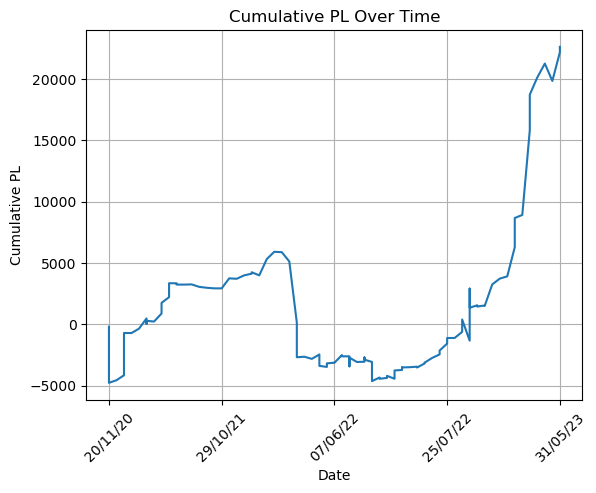

In [10]:
date = closing_trades["Date"]
cumulative_pl = closing_trades["Cumulative PL"]


plt.plot(date[::-1], cumulative_pl[::-1])
plt.xlabel("Date")
plt.ylabel("Cumulative PL")
plt.title("Cumulative PL Over Time")
plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5)) 
plt.grid(True)
plt.show()

In [11]:
closing_trades_extremes = closing_trades.sort_values(by="ProfitAndLoss", ascending=True)
closing_trades_extremes

,Date,MarketName,ProfitAndLoss,Open level,Close level,Size,DateUtc,OpenDateUtc,Cumulative PL
108,12/05/22,US 500 Cash (£1),-4987.20,4152.96,3903.60000,+20,2022-05-12T10:02:25,2022-05-05T16:31:06,135.12
145,20/11/20,US Tech 100 13000 CALL converted at 0.75649826...,-4573.03,120.9,0.00000,+0.50,2020-11-20T16:04:06,2020-10-13T18:41:47,-4769.75
107,12/05/22,US Tech 100 Cash (£1),-2699.75,12913.9,11834.00000,+2.50,2022-05-12T10:02:26,2022-05-05T16:30:58,-2564.63
22,04/10/22,Natural Gas (£1),-1722.00,5621,6482.00000,-2,2022-10-04T12:50:06,2022-07-07T11:56:55,-1331.28
19,04/10/22,Tesla Motors Inc (All Sessions) converted at 0...,-1535.60,249.59,242.59960,+250,2022-10-04T17:19:00,2022-10-04T12:50:47,1352.72
...,...,...,...,...,...,...,...,...,...
11,10/11/22,EUR/USD Mini converted at 0.853037133692725,2380.83,0.98831,1.01622,+10,2022-11-10T15:12:54,2022-11-02T01:31:40,6289.09
5,20/12/22,EUR/USD Mini converted at 0.819925761696725,2719.69,0.99664,1.06298,+5,2022-12-20T09:49:38,2022-10-25T19:45:57,18722.85
142,04/03/21,US Tech 100 Cash (£1),3446.50,13381.7,12692.40000,-5,2021-03-04T13:27:40,2021-01-21T16:32:18,-706.28
21,04/10/22,Natural Gas (£1),4240.00,8178,6482.00000,-2.50,2022-10-04T12:50:06,2022-08-05T00:51:41,2908.72


It would be interesting to have a look at the most and least profitable trades and their location in regards to time.

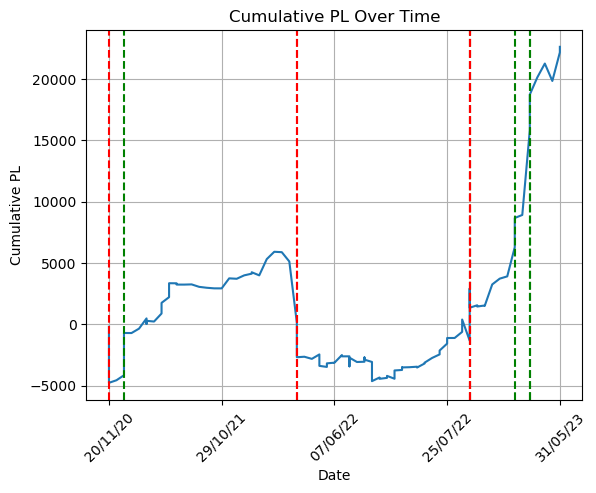

In [12]:
date = closing_trades["Date"]
cumulative_pl = closing_trades["Cumulative PL"]

plt.plot(date[::-1], cumulative_pl[::-1])
plt.xlabel("Date")
plt.ylabel("Cumulative PL")
plt.title("Cumulative PL Over Time")
plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5)) 
plt.grid(True)


top_5_trades = closing_trades_extremes.tail(5)
bottom_5_trades = closing_trades_extremes.head(5)

for _, trade in top_5_trades.iterrows():
    plt.axvline(trade["Date"], color='g', linestyle='--')

for _, trade in bottom_5_trades.iterrows():
    plt.axvline(trade["Date"], color='r', linestyle='--')

plt.show()

While this review does not involve evaluating any specific trading strategy, we can still explore potential correlations between the Profit and Loss (PL) and other variables, such as the duration of time held or the impact of placing trades at specific times of the day. It would be intriguing to examine how the timing of order placement and live trade execution are related, as well as how the cumulative PL is affected by the differentiation between automatic and manual closing of trades. Unfortunately, the History file does not provide the necessary information for such analysis. However, it is worth mentioning that approximately two-thirds of the trades were executed on the live market, while the remaining one-third consisted of orders. Therefore, analysing the effect of the time of day on trade execution and its impact on the cumulative PL would have provided valuable insights, but unfortunately, the data does not allow for such exploration.

## Relationship between time held and P/L

In [13]:
closing_trades["OpenDateUtc"] = pd.to_datetime(closing_trades["OpenDateUtc"])
closing_trades["DateUtc"] = pd.to_datetime(closing_trades["DateUtc"])
closing_trades["TradeDuration"] = closing_trades["DateUtc"] - closing_trades["OpenDateUtc"]
closing_trades_extremes["DayOfWeek"] = closing_trades["OpenDateUtc"].dt.dayofweek
closing_trades["DayOfWeek"] = closing_trades["OpenDateUtc"].dt.dayofweek # Day 0 = monday in daytime module

closing_trades

,Date,MarketName,ProfitAndLoss,Open level,Close level,Size,DateUtc,OpenDateUtc,Cumulative PL,TradeDuration,DayOfWeek
0,31/05/23,Spot Gold (£1 Contract),453.60,2008.15,1962.79000,-10,2023-05-31 12:52:26,2023-05-12 12:32:29,22618.93,19 days 00:19:57,4
1,31/05/23,FTSE 100 Cash (£2),2328.00,7558.8,7500.60000,-20,2023-05-31 12:52:13,2023-01-03 14:29:33,22165.33,147 days 22:22:40,1
2,17/05/23,ASOS PLC,-1417.50,528.6,434.10000,+1500,2023-05-17 11:44:33,2023-05-12 12:32:14,19837.33,4 days 23:12:19,4
3,16/05/23,Natural Gas (£1),1128.00,2256,2538.00000,+4,2023-05-16 15:30:21,2023-05-12 12:31:17,21254.83,4 days 02:59:04,4
4,03/01/23,EUR/USD Mini converted at 0.828303850155695,1403.98,1.0628,1.05715,-30,2023-01-03 14:29:27,2022-12-20 09:51:51,20126.83,14 days 04:37:36,1
...,...,...,...,...,...,...,...,...,...,...,...
142,04/03/21,US Tech 100 Cash (£1),3446.50,13381.7,12692.40000,-5,2021-03-04 13:27:40,2021-01-21 16:32:18,-706.28,41 days 20:55:22,3
143,04/03/21,Netflix Inc (All Sessions) converted at 0.7133...,406.74,564.9,524.17000,-14,2021-03-04 13:27:35,2021-01-20 00:09:04,-4152.78,43 days 13:18:31,2
144,21/01/21,Workhorse Group Inc converted at 0.72494152199094,210.23,22.96,23.25000,+1000,2021-01-21 16:32:02,2020-10-13 18:04:55,-4559.52,99 days 22:27:07,1
145,20/11/20,US Tech 100 13000 CALL converted at 0.75649826...,-4573.03,120.9,0.00000,+0.50,2020-11-20 16:04:06,2020-10-13 18:41:47,-4769.75,37 days 21:22:19,1


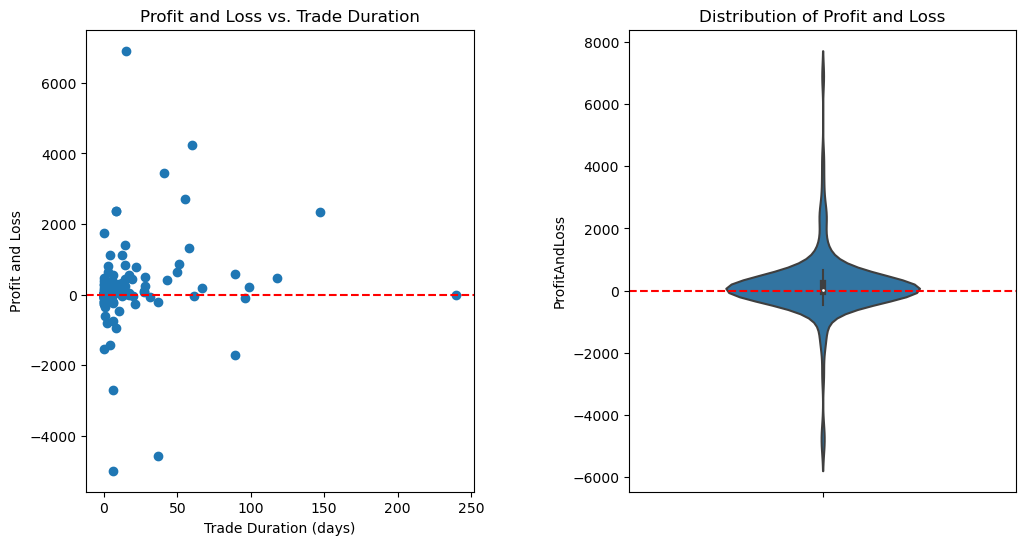

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(closing_trades["TradeDuration"].dt.days, closing_trades["ProfitAndLoss"])
axs[0].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[0].set_xlabel("Trade Duration (days)")
axs[0].set_ylabel("Profit and Loss")
axs[0].set_title("Profit and Loss vs. Trade Duration")

sns.violinplot(data=closing_trades, y="ProfitAndLoss", ax=axs[1], scale='width', width=0.5)
axs[1].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[1].set_title('Distribution of Profit and Loss')

plt.subplots_adjust(wspace=0.4)

plt.show()

In [15]:
print(closing_trades["ProfitAndLoss"].dtype)
print(closing_trades["TradeDuration"].dtype)


float64
timedelta64[ns]


In [16]:
trade_duration_hours = closing_trades["TradeDuration"] / np.timedelta64(1, 'h')
correlation = closing_trades["ProfitAndLoss"].corr(trade_duration_hours)
print("Correlation between 'Profit and Loss' and 'Trade Duration':", correlation)

Correlation between 'Profit and Loss' and 'Trade Duration': 0.15020692835869826


We can examine potential changes in trading strategy by considering trades placed before and after the midpoint of my trading journey, approximately around October 2021.

In [17]:
date_threshold = pd.to_datetime('2021-10-01')

df_before = closing_trades[closing_trades['OpenDateUtc'] < date_threshold]
df_after = closing_trades[closing_trades['OpenDateUtc'] >= date_threshold]

df_before['TradeDuration'] = df_before['DateUtc'] - df_before['OpenDateUtc']
df_after['TradeDuration'] = df_after['DateUtc'] - df_after['OpenDateUtc']

df_before['TradeDuration'] = df_before['DateUtc'] - df_before['OpenDateUtc']
df_after['TradeDuration'] = df_after['DateUtc'] - df_after['OpenDateUtc']

df_before['TradeDuration'] = df_before['TradeDuration'] / pd.Timedelta(hours=1)
df_after['TradeDuration'] = df_after['TradeDuration'] / pd.Timedelta(hours=1)

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_21296\2485543654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['TradeDuration'] = df_before['DateUtc'] - df_before['OpenDateUtc']
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_21296\2485543654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['TradeDuration'] = df_after['DateUtc'] - df_after['OpenDateUtc']
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_21296\2485543654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

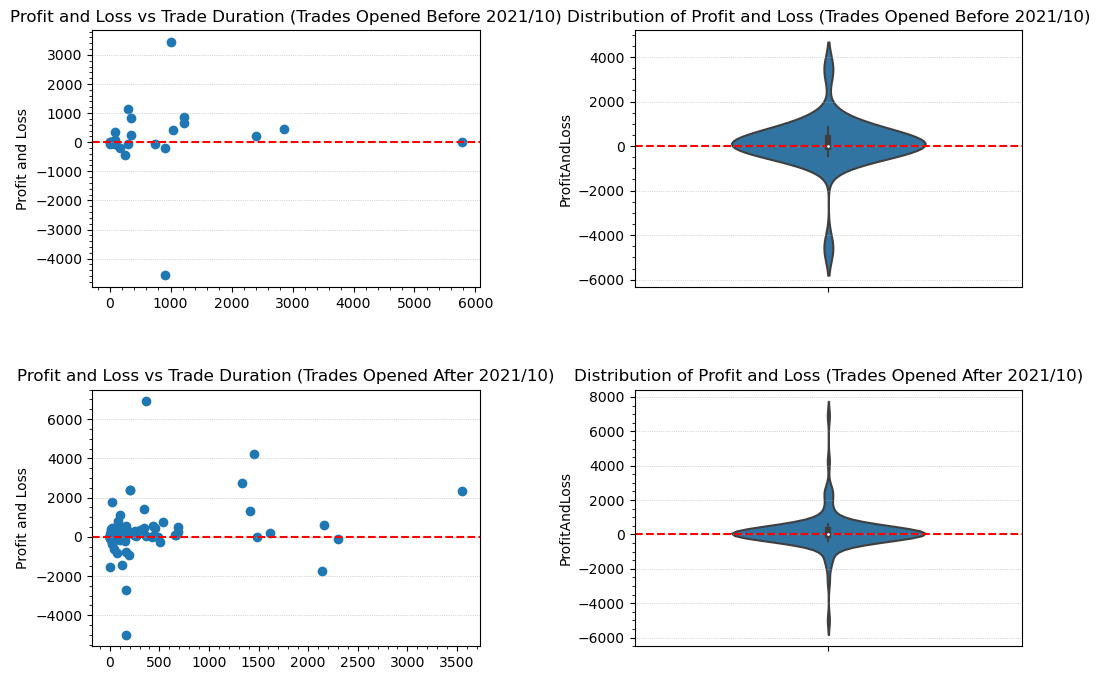

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Priot 2021/10
axs[0, 0].scatter(df_before['TradeDuration'], df_before['ProfitAndLoss'])
axs[0, 0].set_ylabel('Profit and Loss')
axs[0, 0].set_title('Profit and Loss vs Trade Duration (Trades Opened Before 2021/10)')
axs[0, 0].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[0, 0].minorticks_on()
axs[0, 0].grid(axis='y', which='major', linestyle=':', linewidth=0.5)

# Violin prior 2021/10
sns.violinplot(y=df_before['ProfitAndLoss'], ax=axs[0, 1], scale='width', width=0.5)
axs[0, 1].set_title('Distribution of Profit and Loss (Trades Opened Before 2021/10)')
axs[0, 1].minorticks_on()
axs[0, 1].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[0, 1].grid(axis='y', which='major', linestyle=':', linewidth=0.5)

# Post 2021/10
axs[1, 0].scatter(df_after['TradeDuration'], df_after['ProfitAndLoss'])
axs[1, 0].set_ylabel('Profit and Loss')
axs[1, 0].set_title('Profit and Loss vs Trade Duration (Trades Opened After 2021/10)')
axs[1, 0].minorticks_on()
axs[1, 0].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[1, 0].grid(axis='y', which='major', linestyle=':', linewidth=0.5)

# Violin Post 2021/10
sns.violinplot(y=df_after['ProfitAndLoss'], ax=axs[1, 1], scale='width', width=0.5)
axs[1, 1].set_title('Distribution of Profit and Loss (Trades Opened After 2021/10)')
axs[1, 1].minorticks_on()
axs[1, 1].axhline(0, color='red', linestyle='--')  # Add a line at y=0
axs[1, 1].grid(axis='y', which='major', linestyle=':', linewidth=0.5)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [19]:
correlation_before = df_before['ProfitAndLoss'].corr(df_before['TradeDuration'])
print("Correlation (Before 2021/10):", correlation_before)

correlation_after = df_after['ProfitAndLoss'].corr(df_after['TradeDuration'])
print("Correlation (After 2021/10):", correlation_after)

Correlation (Before 2021/10): 0.04057831261916062
Correlation (After 2021/10): 0.24235957305880035


Based on the analysis of the trading data, it appears that there is a notable positive correlation between the duration of trades and their profitability during the later phase of my trading journey. This suggests that the length of time a trade is held has a stronger influence on the profitability of trades in the latter period This observation can be interpreted as either a tendency to avoid holding onto losing trades or a willingness to allow profitable trades to continue. To further explore the impact of trading on different days of the week, let's examine how it may affect the overall profitability and loss (P/L).


## Profit and loses for certain days of the week


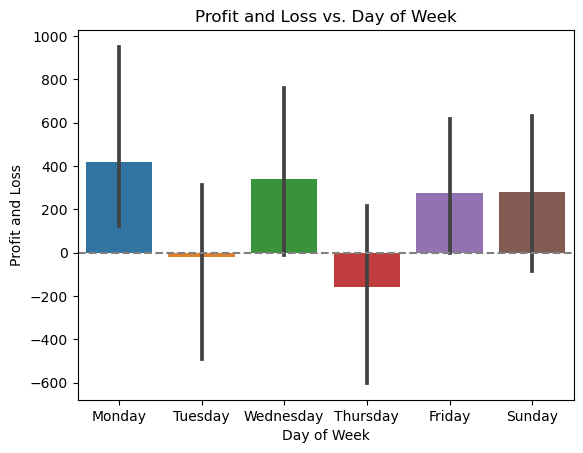

In [20]:
#SNS module plots bar values as mean, hence why some of the extreme values can not be seen.

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']

sns.barplot(x="DayOfWeek", y="ProfitAndLoss", data=closing_trades)
plt.xlabel("Day of Week")
plt.ylabel("Profit and Loss")
plt.title("Profit and Loss vs. Day of Week")

plt.xticks(range(len(day_labels)), day_labels)
plt.axhline(0, color='grey', linestyle='--')

plt.show()

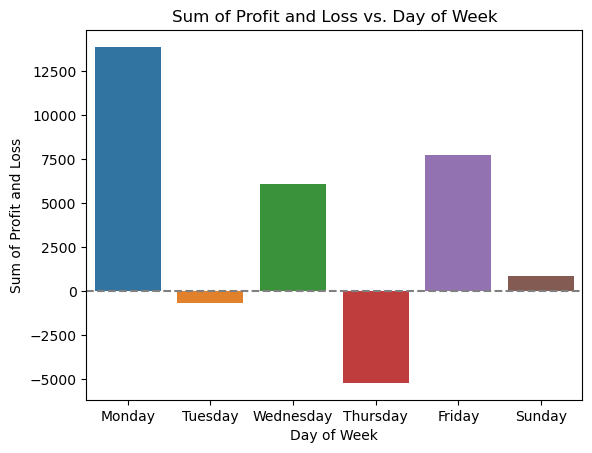

DayOfWeek
0    13854.97
1     -681.13
2     6083.15
3    -5209.41
4     7737.91
6      833.44
Name: ProfitAndLoss, dtype: float64

In [21]:
profit_loss_sum = closing_trades.groupby("DayOfWeek")["ProfitAndLoss"].sum()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']

sns.barplot(x=days_of_week, y=profit_loss_sum)

plt.xlabel('Day of Week')
plt.ylabel('Sum of Profit and Loss')
plt.title('Sum of Profit and Loss vs. Day of Week')
plt.axhline(0, color='grey', linestyle='--')

plt.show()

profit_loss_sum

The difference between days is astounding. We could quickly review if the distribution remains for the trades prior and post 10/2021 

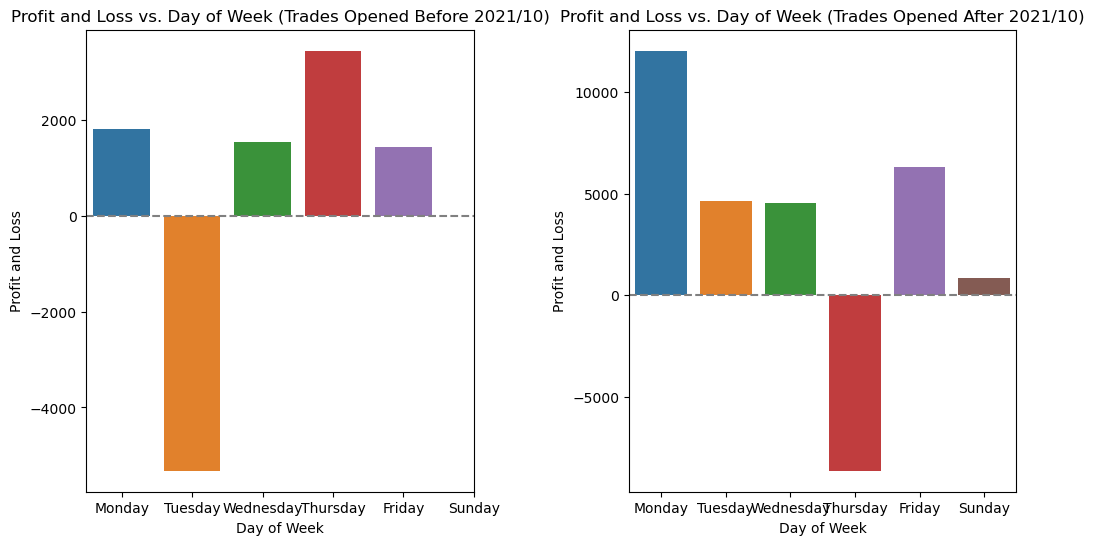

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Prior 2021/10
sns.barplot(x="DayOfWeek", y="ProfitAndLoss", data=df_before, ci=None, estimator=sum, ax=axs[0])
axs[0].set_xlabel("Day of Week")
axs[0].set_ylabel("Profit and Loss")
axs[0].set_title("Profit and Loss vs. Day of Week (Trades Opened Before 2021/10)")
axs[0].set_xticks(range(len(day_labels)))
axs[0].set_xticklabels(day_labels)
axs[0].axhline(0, color='grey', linestyle='--')

# Post 2021/10
sns.barplot(x="DayOfWeek", y="ProfitAndLoss", data=df_after, ci=None, estimator=sum, ax=axs[1])
axs[1].set_xlabel("Day of Week")
axs[1].set_ylabel("Profit and Loss")
axs[1].set_title("Profit and Loss vs. Day of Week (Trades Opened After 2021/10)")
axs[1].set_xticks(range(len(day_labels)))
axs[1].set_xticklabels(day_labels)
axs[1].axhline(0, color='grey', linestyle='--')

plt.subplots_adjust(wspace=0.4)


plt.show()

In [24]:
most_profitable_trades = pd.DataFrame(closing_trades_extremes["ProfitAndLoss"].tail(5))
merged_most_profitable = most_profitable_trades.merge(closing_trades[["DayOfWeek"]], left_index=True, right_index=True)
merged_most_profitable

,ProfitAndLoss,DayOfWeek
11,2380.83,2
5,2719.69,1
142,3446.50,3
21,4240.00,4
8,6908.80,0


In [25]:
least_profitable_trades = pd.DataFrame(closing_trades_extremes["ProfitAndLoss"].head(5))
merged_least_profitable = least_profitable_trades.merge(closing_trades[["DayOfWeek"]], left_index=True, right_index=True)
merged_least_profitable

,ProfitAndLoss,DayOfWeek
108,-4987.20,3
145,-4573.03,1
107,-2699.75,3
22,-1722.00,3
19,-1535.60,1


Having a few major losses on the same day of the week can significantly skew the profit and loss (P/L) graphs for that particular day. Additionally, trade IDs 108 and 107 were executed on the same day and were force closed due to overleverage and large swings. Therefore, it is unlikely that the day of the week has a significant influence on the profitability of trades. However, it is important to note that days of the week do influence market fluctuations, and generally, the greatest swings are observed on Mondays and Fridays, while Wednesdays tend to have lower volatility. 

But for now this was a fun bit of exercise.